In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
INPUT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/training_dataset.csv"
ATT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/training_dataset_clean.csv"
ONE_HOT_ENCODED_2CLASSES_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/training_dataset_onehot_2clases.csv"
CONTINUOUS_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/training_dataset_continuous.csv"

In [ ]:
dataset = pd.read_csv(INPUT_FILE_NAME)
dataset.columns

Index(['Unnamed: 0', 'Num_Cells_Strain1', 'Num_Cells_Strain2', 't_deg',
       'k_degA', 'k_degB', 'ratioS1', 'ratioS2', 'posS1', 'posS2',
       'Stability'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['Unnamed: 0', 'posS1', 'posS2'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Num_Cells_Strain1  5167 non-null   int64  
 1   Num_Cells_Strain2  5167 non-null   int64  
 2   t_deg              5167 non-null   int64  
 3   k_degA             5167 non-null   float64
 4   k_degB             5167 non-null   float64
 5   ratioS1            5166 non-null   float64
 6   ratioS2            5166 non-null   float64
 7   Stability          5167 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 323.1 KB


In [ ]:
dataset[:10]

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability
0,8,4,12,0.1,0.3,1.074368,0.584471,0.2
1,8,4,24,0.1,0.6,1.074368,0.584471,1.0
2,8,4,46,0.5,0.3,1.177532,0.926172,1.0
3,8,4,12,0.5,0.5,1.177532,0.926172,1.0
4,8,4,24,0.5,0.5,1.177532,0.926172,1.0
5,8,4,36,0.5,0.5,1.177532,0.926172,1.0
6,8,4,46,0.5,0.5,1.177532,0.926172,1.0
7,8,4,12,0.5,0.6,1.177532,0.926172,1.0
8,8,4,24,0.5,0.6,1.177532,0.926172,1.0
9,8,4,36,0.5,0.6,1.177532,0.926172,1.0


In [ ]:
dataset[-10:]

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability
5157,7,9,12,0.6,0.6,1000.0,1000.0,1.0
5158,7,9,24,0.6,0.6,1000.0,1000.0,1.0
5159,7,9,36,0.6,0.6,1000.0,1000.0,1.0
5160,7,9,46,0.6,0.6,1000.0,1000.0,1.0
5161,7,9,46,0.1,0.3,1000.0,1000.0,0.8
5162,7,9,12,0.1,0.5,1000.0,1000.0,1.0
5163,7,9,24,0.1,0.5,1000.0,1000.0,1.0
5164,7,9,36,0.1,0.5,1000.0,1000.0,1.0
5165,7,9,46,0.1,0.5,1000.0,1000.0,1.0
5166,7,9,12,0.1,0.6,1000.0,1000.0,1.0


**First Step:** find out whether or not there are missing values. 

In [ ]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}



{'Num_Cells_Strain1': 0,
 'Num_Cells_Strain2': 0,
 'Stability': 0,
 'k_degA': 0,
 'k_degB': 0,
 'ratioS1': 1,
 'ratioS2': 1,
 't_deg': 0}

Missing values are replaced by a 3 (ratio higher in comparison to the highest)

In [ ]:
dataset = dataset.fillna(3)
dataset['ratioS1'] = dataset['ratioS1'].replace([1000], 3)
dataset['ratioS2'] = dataset['ratioS2'].replace([1000], 3)

**Second Step**: Check outliers and scale data. There are several actions to consider regarding outliers:


1.   **Scale** each attribute based on its mean and standard deviation (normalization). This approach may produce values larger than 1 or lower than -1.
2.   **Remove** rows containing outliers; at least some of them. The disadvantage is that we do not have so many examples in the dataset.
3.   **Curate** data by modifying outliers.

In [ ]:
normalized_ds = pd.DataFrame (scale (dataset.drop (columns='Stability'), axis=0, copy=True),columns=dataset.drop (columns='Stability').columns) 
normalized_ds

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2
0,0.961867,-0.410241,-1.371018,-1.141528,-1.334850,0.337716,-0.721899
1,0.961867,-0.410241,-0.430470,-1.141528,1.070021,0.337716,-0.721899
2,0.961867,-0.410241,1.293868,0.908620,-1.334850,0.564425,0.081307
3,0.961867,-0.410241,-1.371018,0.908620,0.268397,0.564425,0.081307
4,0.961867,-0.410241,-0.430470,0.908620,0.268397,0.564425,0.081307
...,...,...,...,...,...,...,...
5162,0.610260,1.377039,-1.371018,-1.141528,0.268397,4.569403,4.956066
5163,0.610260,1.377039,-0.430470,-1.141528,0.268397,4.569403,4.956066
5164,0.610260,1.377039,0.510078,-1.141528,0.268397,4.569403,4.956066
5165,0.610260,1.377039,1.293868,-1.141528,0.268397,4.569403,4.956066


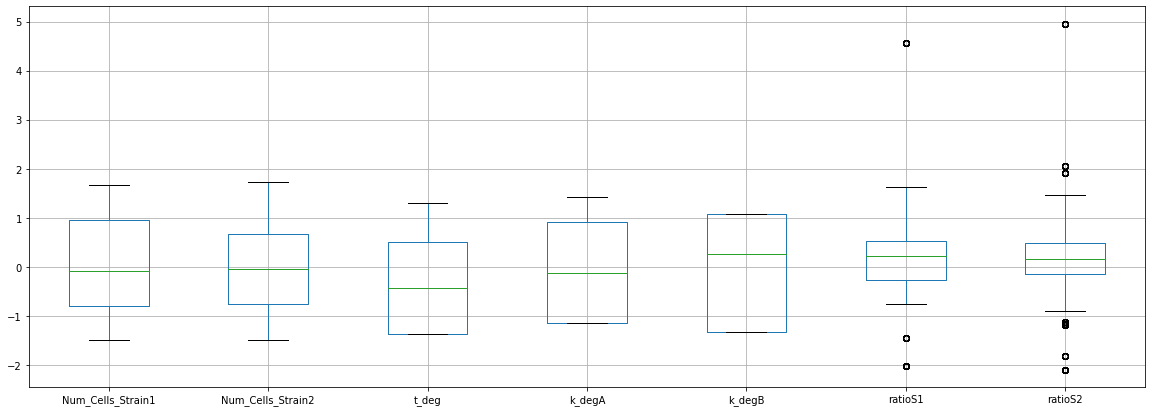

In [ ]:
normalized_ds.boxplot(figsize=(20,7))

In [ ]:
standardized_ds = pd.DataFrame (minmax_scale (dataset.drop (columns='Stability'), axis=0, copy=True),columns=dataset.drop (columns='Stability').columns) 
standardized_ds

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2
0,0.777778,0.333333,0.000000,0.0,0.000000,0.358123,0.194824
1,0.777778,0.333333,0.352941,0.0,1.000000,0.358123,0.194824
2,0.777778,0.333333,1.000000,0.8,0.000000,0.392511,0.308724
3,0.777778,0.333333,0.000000,0.8,0.666667,0.392511,0.308724
4,0.777778,0.333333,0.352941,0.8,0.666667,0.392511,0.308724
...,...,...,...,...,...,...,...
5162,0.666667,0.888889,0.000000,0.0,0.666667,1.000000,1.000000
5163,0.666667,0.888889,0.352941,0.0,0.666667,1.000000,1.000000
5164,0.666667,0.888889,0.705882,0.0,0.666667,1.000000,1.000000
5165,0.666667,0.888889,1.000000,0.0,0.666667,1.000000,1.000000


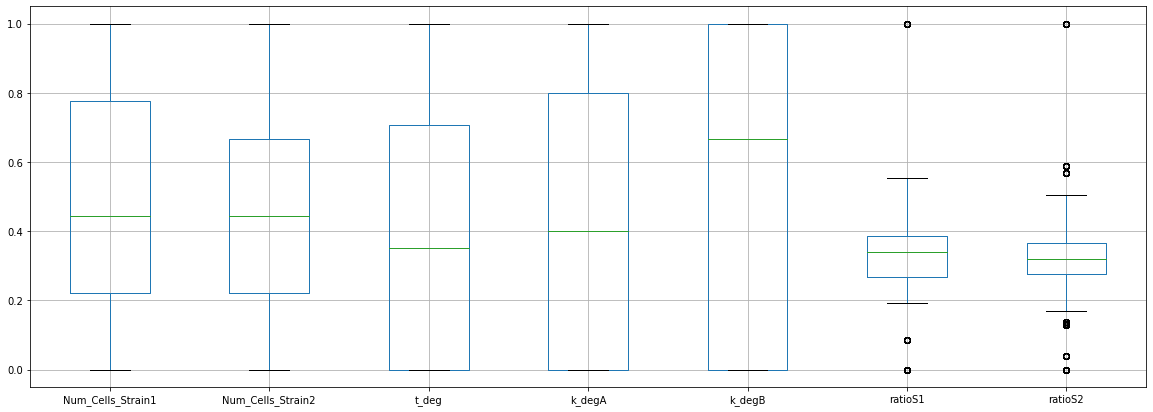

In [ ]:
standardized_ds.boxplot(figsize=(20,7))

Both boxplot figures show the existence of really few outliers. We proceed to curate the data.
**We study each attribute** and apply modifications to outliers to get them into the normal distribution.


**ratioS1**

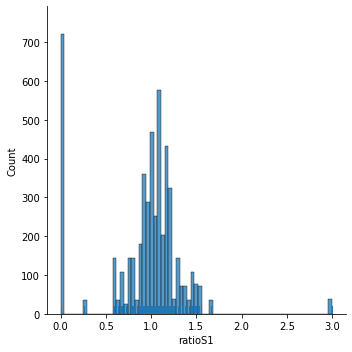

In [ ]:
sns.displot(dataset["ratioS1"], kde=False, rug=True)

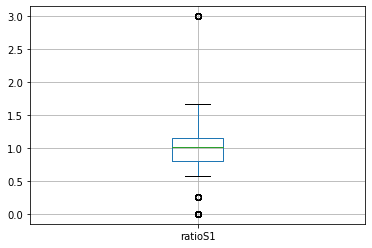

In [ ]:
dataset.boxplot(column=['ratioS1'])

In [ ]:
print("minimum: ",np.amin(dataset['ratioS1'].values), "Maximum: ", np.amax(dataset['ratioS1'].values))

minimum:  0.0 Maximum:  3.0


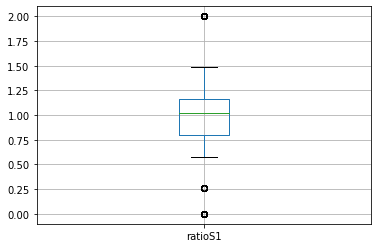

In [ ]:
dataset.loc[dataset['ratioS1'] > 1.5,'ratioS1']= 2
dataset.boxplot(column=['ratioS1'])

**ratioS2**

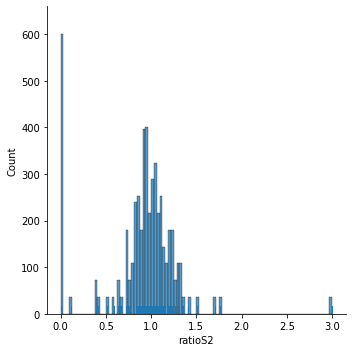

In [ ]:
sns.displot(dataset["ratioS2"], kde=False, rug=True)

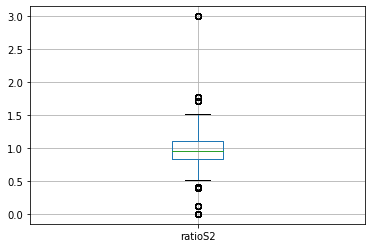

In [ ]:
dataset.boxplot(column=['ratioS2'])

In [ ]:
print("minimum: ",np.amin(dataset['ratioS2'].values), "Maximum: ", np.amax(dataset['ratioS2'].values))

minimum:  0.0 Maximum:  3.0


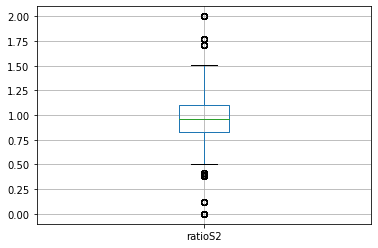

In [ ]:
dataset.loc[dataset['ratioS2'] > 1.8,'ratioS2']= 2
dataset.boxplot(column=['ratioS2'])

Let's see the **correlation matrix** and **descriptive statistics** on the dataset. The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [ ]:
dataset.corr()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability
Num_Cells_Strain1,1.000000,-0.123269,0.000116,0.000196,0.000947,0.404614,-0.091390,0.067545
Num_Cells_Strain2,-0.123269,1.000000,-0.000567,-0.000261,0.000747,-0.074076,0.432325,0.053286
t_deg,0.000116,-0.000567,1.000000,0.000701,0.000261,-0.000870,-0.000870,0.017460
k_degA,0.000196,-0.000261,0.000701,1.000000,0.001358,-0.005951,0.009922,0.215318
k_degB,0.000947,0.000747,0.000261,0.001358,1.000000,-0.002988,-0.000838,0.516347
ratioS1,0.404614,-0.074076,-0.000870,-0.005951,-0.002988,1.000000,-0.107113,0.064377
ratioS2,-0.091390,0.432325,-0.000870,0.009922,-0.000838,-0.107113,1.000000,0.073389
Stability,0.067545,0.053286,0.017460,0.215318,0.516347,0.064377,0.073389,1.000000


In [ ]:
dataset.describe()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability
count,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000,5167.000000
mean,5.264370,5.147668,29.492162,0.322721,0.466518,0.926077,0.884422,0.846913
std,2.844358,2.797818,12.759755,0.195127,0.124759,0.453824,0.397401,0.266314
min,1.000000,1.000000,12.000000,0.100000,0.300000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,12.000000,0.100000,0.300000,0.799349,0.829826,0.800000
50%,5.000000,5.000000,24.000000,0.300000,0.500000,1.022542,0.956797,1.000000
75%,8.000000,7.000000,36.000000,0.500000,0.600000,1.159105,1.101896,1.000000
max,10.000000,10.000000,46.000000,0.600000,0.600000,2.000000,2.000000,1.000000


Check how many instances per label there are and group them if necessary.

In [ ]:
dataset['Stability'].value_counts()

1.0    3388
0.9     330
0.8     229
0.7     214
0.6     202
0.5     192
0.4     166
0.3     147
0.2     111
0.0     107
0.1      81
Name: Stability, dtype: int64

In [ ]:
dataset.shape

(5167, 8)

Suffle the dataset (three times):

In [ ]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability
0,1,10,12,0.1,0.3,0.000000,1.204721,0.2
1,7,7,36,0.3,0.5,1.157516,0.881653,1.0
2,1,2,12,0.3,0.5,0.000000,1.326462,1.0
3,2,2,46,0.3,0.6,2.000000,1.121286,1.0
4,1,3,24,0.3,0.6,0.000000,0.652987,1.0


Split the dataset vertically into attributes $x$ and label $t$ (target) for supervised learning. There are 7 *attributes*, and one *label* (stabulity) with two different values or *classes*.

In [ ]:
t = dataset.Stability
t[:10]

#Guardamos t en el archivo continuous
t.to_csv(CONTINUOUS_FILE_NAME, index = False)

One-hot encode the classes for a classification problem.

In [ ]:
# 2 CLASSES #
dataset.loc[dataset['Stability'] < 1.0 ,'Stability'] =0
dataset['Stability'].value_counts()

1.0    3388
0.0    1779
Name: Stability, dtype: int64

In [ ]:
t = dataset.Stability
x = dataset.drop (columns='Stability')

x.head()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2
0,1,10,12,0.1,0.3,0.000000,1.204721
1,7,7,36,0.3,0.5,1.157516,0.881653
2,1,2,12,0.3,0.5,0.000000,1.326462
3,2,2,46,0.3,0.6,2.000000,1.121286
4,1,3,24,0.3,0.6,0.000000,0.652987


In [ ]:
#Guardamos el binary file 0 y 1
t.to_csv(CONTINUOUS_2LABEL_FILE_NAME, index = False)

In [ ]:
# 2 CLASSES #
names = np.array(['Unstable', 'Stable'])
names

array(['Unstable', 'Stable'], dtype='<U8')

In [ ]:
# 2 CLASSES

#One-hot encoding

encoder = OneHotEncoder(categories="auto", sparse=False) # Function that one-hot encodes integers
one_hot_t = encoder.fit_transform (t.values.reshape(-1,1))
one_hot_t[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=names)
one_hot_t[:10]

,Unstable,Stable
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


In [ ]:
print("ratioS1: Minimum: ",np.amin(dataset['ratioS1'].values), "Maximum: ", np.amax(dataset['ratioS1'].values))
print("ratioS2: Minimum: ",np.amin(dataset['ratioS2'].values), "Maximum: ", np.amax(dataset['ratioS2'].values))
print("Num_Cells_Strain1: Minimum: ",np.amin(dataset['Num_Cells_Strain1'].values), "Maximum: ", np.amax(dataset['Num_Cells_Strain1'].values))
print("Num_Cells_Strain2: Minimum: ",np.amin(dataset['Num_Cells_Strain2'].values), "Maximum: ", np.amax(dataset['Num_Cells_Strain2'].values))
print("t_deg: Minimum: ",np.amin(dataset['t_deg'].values), "Maximum: ", np.amax(dataset['t_deg'].values))
print("k_degA: Minimum: ",np.amin(dataset['k_degA'].values), "Maximum: ", np.amax(dataset['k_degA'].values))
print("k_degB: Minimum: ",np.amin(dataset['k_degB'].values), "Maximum: ", np.amax(dataset['k_degB'].values))

ratioS1: Minimum:  0.0 Maximum:  2.0
ratioS2: Minimum:  0.0 Maximum:  2.0
Num_Cells_Strain1: Minimum:  1 Maximum:  10
Num_Cells_Strain2: Minimum:  1 Maximum:  10
t_deg: Minimum:  12 Maximum:  46
k_degA: Minimum:  0.1 Maximum:  0.6
k_degB: Minimum:  0.3 Maximum:  0.6


Min-max scale of the input dataset (attributes) within the range [-1,1] for each feature independently.

In [ ]:
x_s = pd.DataFrame (minmax_scale (x, feature_range=(-1, 1),axis=0, copy=True),columns=x.columns) 
x_s[:10]

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2
0,-0.777778,-0.333333,-1.000000,-1.0,0.333333,1.000000,-0.090580
1,0.555556,-0.111111,1.000000,0.6,1.000000,-0.200651,-0.202708
2,0.111111,0.777778,-0.294118,-0.2,-1.000000,0.097955,-0.039851
3,0.333333,-1.000000,-0.294118,1.0,0.333333,0.481777,-1.000000
4,-1.000000,1.000000,0.411765,-1.0,0.333333,-1.000000,0.204721
5,-0.111111,-0.111111,-0.294118,-1.0,0.333333,-0.054955,0.020051
6,-1.000000,-0.555556,1.000000,1.0,1.000000,-1.000000,0.509916
7,-1.000000,1.000000,1.000000,-0.2,1.000000,-1.000000,0.204721
8,-0.111111,0.777778,1.000000,1.0,0.333333,-0.084548,0.010676
9,-0.333333,-0.111111,1.000000,-1.0,1.000000,0.223316,-0.036210


In [ ]:
x_s.to_csv(ATT_FILE_NAME, index=False)

one_hot_t.to_csv(ONE_HOT_ENCODED_2CLASSES_FILE_NAME, index=False)
#t.to_csv(CONTINUOUS_FILE_NAME, index = False)
